## 1. 

#### Using pandas import the Excel file above. Write a code to view the first 5 rows of your DataFrame.

In [1]:
import pandas as pd

df = pd.read_excel("Asset_sales_data.xlsx")
df.head()

,date,products,sales
0,11-20-2021,cars,19234
1,12-12-2021,boats,87598
2,11-07-2021,cars,15900
3,12-06-2021,boats,12087
4,12-09-2021,cars,56897


## 2.

#### Write another code that will return the data types of all the columns in the DataFrame.

In [2]:
print(df.dtypes)

date        object
products    object
sales        int64
dtype: object


## 3. 

#### Using pandas, what month had the highest value of sales?

In [3]:
# Convert date to pandas datetime object.
df["month"] = pd.to_datetime(df['date']).dt.month
df.head()

,date,products,sales,month
0,11-20-2021,cars,19234,11
1,12-12-2021,boats,87598,12
2,11-07-2021,cars,15900,11
3,12-06-2021,boats,12087,12
4,12-09-2021,cars,56897,12


In [4]:
# Use  groupy and idxmax to find month with max sales
max_sales_month = df.groupby(df['month']).sum(numeric_only=True).idxmax()
max_sales_month

sales    12
dtype: int32

In [5]:
# Use  groupy and idxmax to find column with max sales
sales_per_month = df.groupby(df['month']).sum(numeric_only=True)
sales_per_month

,sales
month,
11,111736
12,565688


## 4.
#### Write a code to return the value of sales between 11-20-2021 to 12-06-2021. Create a Dataframe and return the total sales value for this period.

In [6]:
# Using loc to fiter DataFrame by Date
df2 = df.loc[(df['date'] >= '11-20-2021') & (df['date'] <= '12-06-2021')]
print(df2)

          date products  sales  month
0   11-20-2021     cars  19234     11
3   12-06-2021    boats  12087     12
5   12-06-2021   houses  19345     12
6   11-20-2021     cars  19234     11
8   12-06-2021   houses  20989     12
10  12-06-2021    boats  12087     12
12  11-25-2021     cars  22234     11
14  12-06-2021    boats  14987     12
16  11-20-2021     cars  19234     11


In [7]:
df2["sales"].sum()

159431

## 5. 

#### Using Matplotlib, create a pie chart of the products and their sales values as percentages. Your chart should have labels and a title.

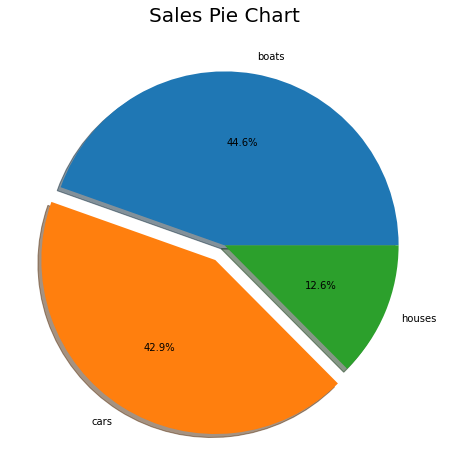

In [8]:
import matplotlib.pyplot as plt

prod_sales = df.groupby(['products'])['sales'].sum()

explode = (0, 0.1, 0)  

plt.figure(figsize=(12, 8))
plt.pie(prod_sales, 
        explode=explode, 
        labels=prod_sales.index, 
        autopct='%1.1f%%', 
        shadow=True)

plt.title("Sales Pie Chart", 
          fontsize=20)
plt.show()

## 6.
#### Use pandas to create a pivot table and calculate the sum of sales column grouped by the products column. Use pandas and Matplotlib to plot this on a bar plot. Your plot size must be width = 12, height =10. Your plot title will be "Total Sales Per Product". 

In [9]:
sales_per_product = df.pivot_table(values='sales', 
                                   index='products', 
                                   aggfunc='sum')
sales_per_product

,sales
products,
boats,301955
cars,290427
houses,85042


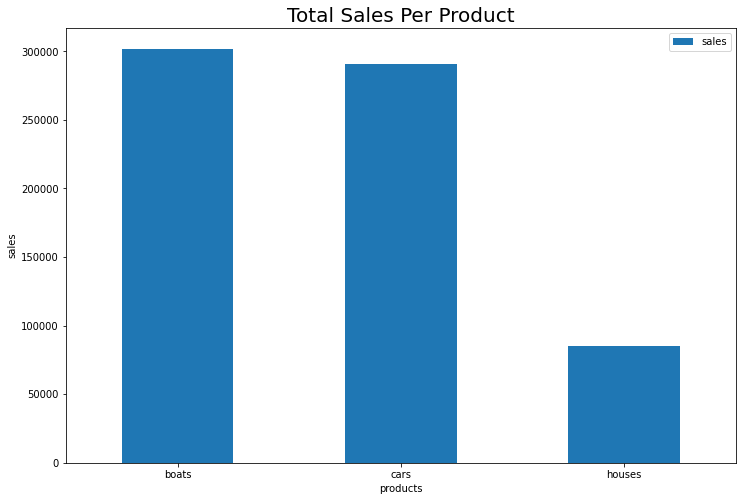

In [10]:
sales_per_product.plot(kind="bar", figsize=(12, 8))
plt.title("Total Sales Per Product", fontsize = 20)
plt.xticks(rotation = 0)
plt.ylabel("sales")
plt.show()